## Estadística Aplicada

Sesión 12 - 11 de septiembre

Nombre: Susana Yareli Lino Reséndiz

Matricula: 1986245

Grupo: 41



In [1]:
#Importar las librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Librerias especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [5]:
#Importat los datos
ejercicio_km = pd.read_excel('/content/drive/MyDrive/sesion12.xlsx')
ejercicio_km

,Individuos,Tiempo,Evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1
5,6,13,1
6,7,16,1
7,8,22,1
8,9,23,1
9,10,6,0


In [6]:
#Estimar el Modelo de Kaplan-Meier
Km1 = KaplanMeierFitter().fit(ejercicio_km['Tiempo'], ejercicio_km['Evento'])

In [7]:
Km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


<Axes: xlabel='timeline'>

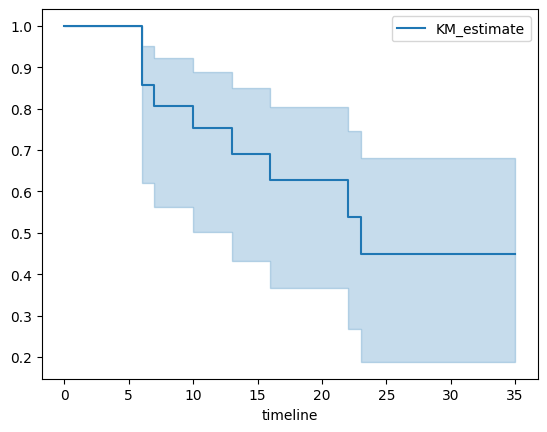

In [10]:
Km1.plot_survival_function()

In [11]:
Km1.median_survival_time_

23.0

El 23 es la mediana, lo que significa que en el tiempo 23 el 50% de los individuos les ha ocurrido el evento o sea se han muerto, o por otro lado el otro 50% no han sufrido el evento o sea no se han muerto.

#Relación

In [12]:
##Importar datos
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')
relacion.head(5)

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Los datos de "relacion" corresponden al tipo de supervivencia de una relacion, el tiempo que pasa desde que inicia la relacion hasta que termina. El tiempo esta medido en semanas y esta en la columna "t". En la variable "estado" 1 significa que el evento ocurrio y 0 que hay censura. En la variable "tratamiento" 1 es "detallista" y 0 es "no detallista". En esta base detallista es quien hizo por lo menos un regalo semanal a su pareja (flores, peluches, paletas, etc)  

In [13]:
#Realizar el estimador de Kaplan-Meier
km_all = KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

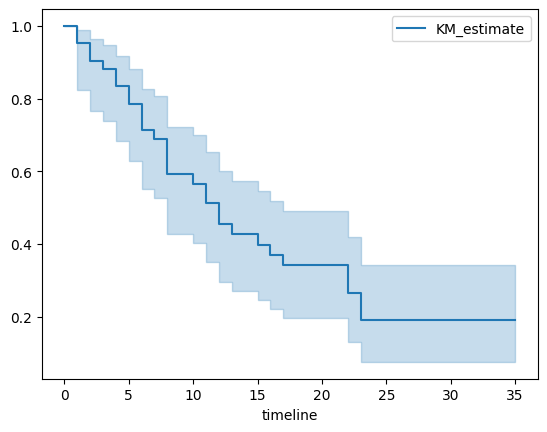

In [15]:
km_all.plot_survival_function();

In [16]:
km_all.median_survival_time_

12.0

En la semana 12 la mitad de las relaciones han terminado, o tambien se puede decir que en la semana 12 la mitad de las relaciones no han terminado.

In [17]:
#Seperar detallistas y no detallistas
detallistas = relacion.query('tratamiento == 1')
no_detallistas = relacion.query('tratamiento == 0')

In [18]:
#Estimar el modelo
km_detallistas = KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_no_detallistas = KaplanMeierFitter().fit(no_detallistas['t'], no_detallistas['estado'])

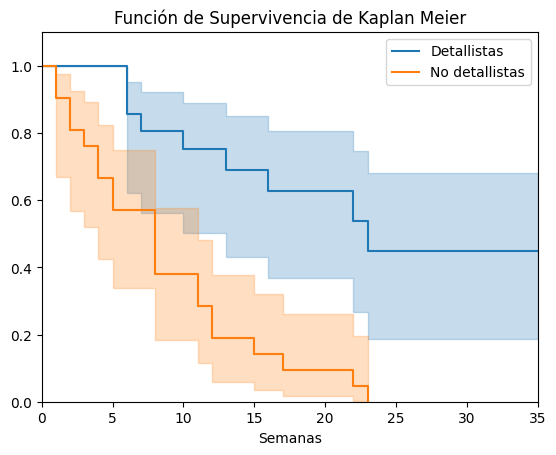

In [21]:
km_detallistas.plot_survival_function(label ='Detallistas')
km_no_detallistas.plot_survival_function(label ='No detallistas')
plt.xlim(0, 35)
plt.ylim(0, 1.1)
plt.xlabel('Semanas')
plt.title('Función de Supervivencia de Kaplan Meier')
plt.show()

Área sombreada es el intervalo de confianza al 95%

Prueba de hipótesis (log rank test)\
$H0: s(1) = s(2)$ Función de supervivencia iguales\
$H0: s(1) \neq s(2)$ Función de supervivencia distintas

In [23]:
#Grupo 1 "detallistas"
LRT = logrank_test(detallistas['t'],no_detallistas['t'], detallistas['estado'], no_detallistas['estado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [24]:
LRT.p_value.round(2)

0.0

Con un $ \alpha = 0.05 $. Rechazamos H0, las funciones de supervivencia son distintas, por lo que la relacion de los detallistas dura mas que la relacion de los no detallistas. La mitad de las relaicones de los detallistas duran de 8 semanas vs la mitad de las relaciones de los detallistas duran 23 semanas.

In [25]:
km_detallistas.median_survival_time_

23.0

In [26]:
km_no_detallistas.median_survival_time_

8.0